<a href="https://colab.research.google.com/github/rmoolchandani/rmoolcha_Capstone/blob/main/Part_1_Importing_and_Cleaning_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes Patient Readmission

### Data Overview

The data I obtained represents 100,000+ unique inpatient diabetes encounters over 10 years (1999–2008) of clinical care at 130 hospitals and integrated delivery networks

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks  throughout the United States: Midwest (18 hospitals), Northeast (58), South (28), and West (16). It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria: 
1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc. For a full  list of attributes and their descriptions, [click here](https://www.hindawi.com/journals/bmri/2014/781670/tab1/)

__Source:__ [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

__Imports__

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# Connect to Google Drive
# Upload the dataset to your Google drive so it can be loaded here
from google.colab import drive
drive.mount('/content/gdrive')

# load the csv file
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/diabetic_data.csv', na_values='?')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


__Read the file and create a pandas dataframe__

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


[attribute details](https://www.hindawi.com/journals/bmri/2014/781670/tab1/)

__Check for dimensions__

In [ ]:
df.shape

(101766, 50)

__A look at data types__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

__Missing Observations__

In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

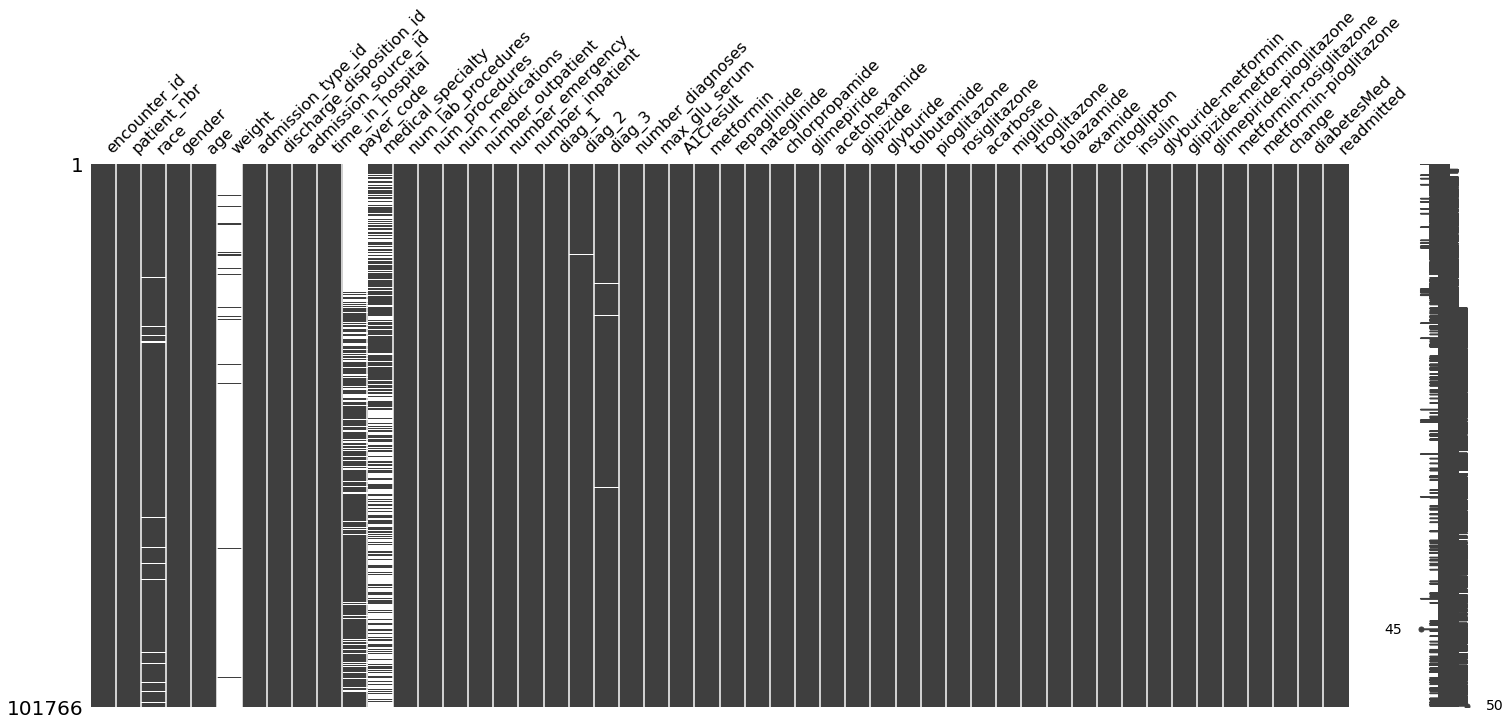

In [ ]:
msno.matrix(df)
plt.show()

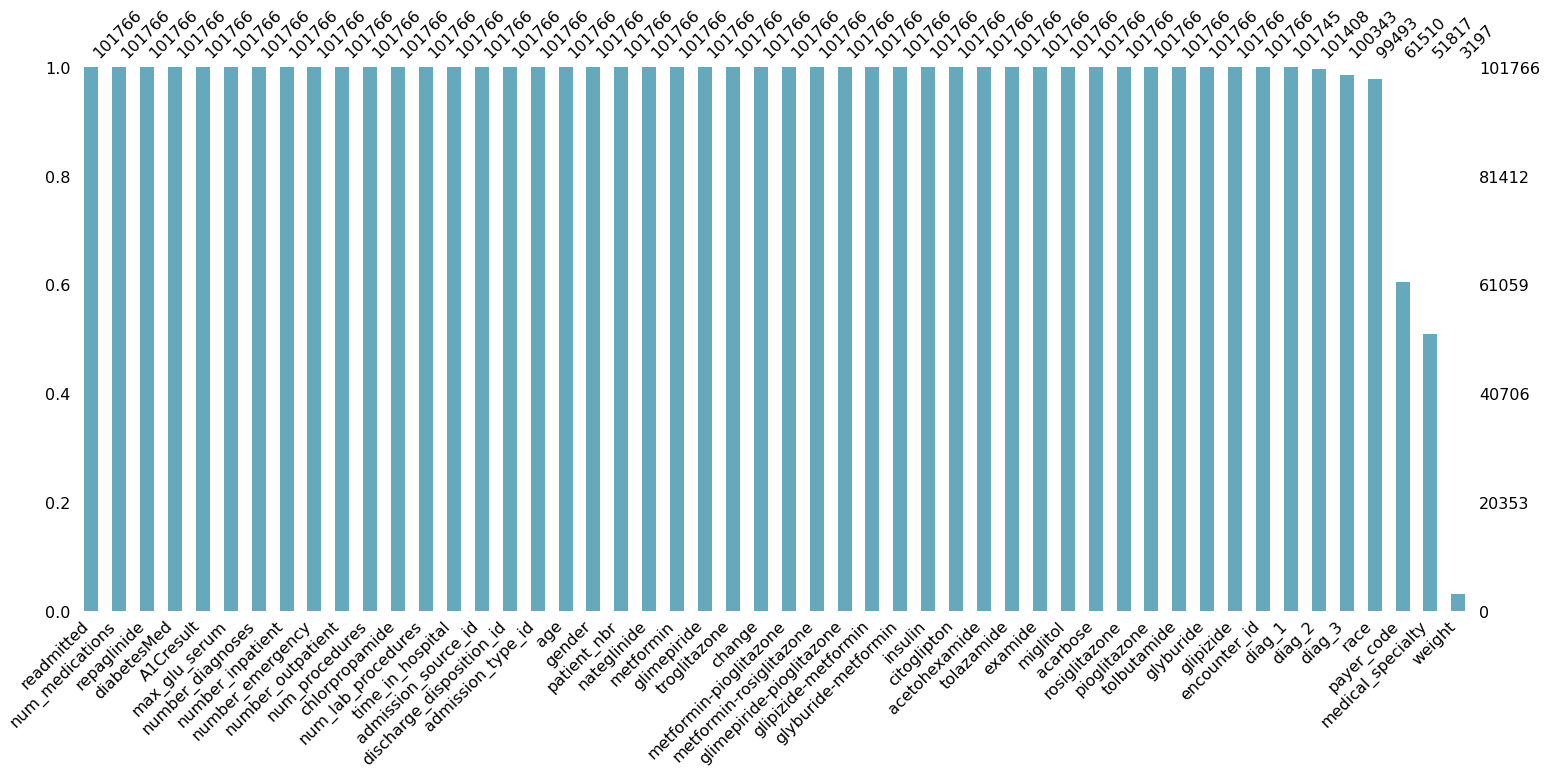

In [ ]:
msno.bar(df,sort='descending',color='#66a9bc')
plt.show()

Per our results above, let's take a closer look at all variables that have missing/null values. Since "weight" had the most number of missing values, let's start with that variable first. 

__Weight__

In [ ]:
df.weight.isnull().sum()

98569

In [ ]:
df.weight.isnull().mean()

0.9685847925633315

Approximately 97% or more than 9,500 of the values denoted under the weight variable are missing or null values. Typically in cases of missing values the next step is to determine which method to best impute the missing values but seeing as over 95% of the values are missing for a data set with over 100,000 observations, it makes much more sense to simply drop the column all together.

In [ ]:
df.drop('weight', axis =1 , inplace = True)

__Payer Code__

In [ ]:
df.payer_code.unique()

array([nan, 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [ ]:
df.payer_code.value_counts(normalize=True)

MC    0.527378
HM    0.102000
SP    0.081401
BC    0.075679
MD    0.057422
CP    0.041180
UN    0.039798
CM    0.031491
OG    0.016794
PO    0.009624
DM    0.008925
CH    0.002374
WC    0.002195
OT    0.001544
MP    0.001284
SI    0.000894
FR    0.000016
Name: payer_code, dtype: float64

In [ ]:
df.payer_code.isnull().sum()

40256

In [ ]:
df.payer_code.isnull().mean()

0.395574160328597

With almost 40% of its data missing, I also decided to drop this variable. 

In [ ]:
df.drop('payer_code',axis=1, inplace = True )

__Medical_Specialty__

In [ ]:
df.medical_specialty.unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [ ]:
df.medical_specialty.isnull().sum()

49949

In [ ]:
df.medical_specialty.isnull().mean()

0.49082208203132677

For the missing null values I researched to see if they indicated a different type of specialist to those listed above or it simply meant that there was no data available for that observation. I found out it was the former. With this in mind, I decided to drop this variable seeing that almost 50% of the data was not available to begin with. Also trying to impute these missing values would introduce more inaccuracy since I'd simply have to make speculations for the missing data.  

In [ ]:
df.drop('medical_specialty',axis=1, inplace = True )

__Race__

In [ ]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
df.race.isnull().sum()

2273

In [ ]:
(df.race.isnull().mean())*100

2.2335554114340743

Approximately 2% or less than 2,300 of the values denoted under race are missing or null values. As dropping these won't result in a great impact to the overall dataset, that's the step I'll take. 

In [ ]:
df.dropna(subset=['race'], inplace = True)

__Diagnoses__

In [ ]:
df.diag_1.isnull().sum()

19

In [ ]:
df.diag_1.isnull().mean()

0.00019096820881871088

In [ ]:
df.diag_2.isnull().sum()

336

In [ ]:
df.diag_2.isnull().mean()

0.0033771220085835186

In [ ]:
df.diag_3.isnull().sum()

1349

In [ ]:
df.diag_3.isnull().mean()

0.013558742826128472

As each of the diagnoses variables have missing or null values that are less that 2% of the remaining observations, dropping these observations won't result in a great impact to the overall dataset. 

In [ ]:
df.dropna(subset=['diag_1','diag_2','diag_3'], inplace = True)

In [ ]:
df.shape

(98053, 47)

In [ ]:
(98053/101766)*100

96.35143368119017

Summary:

* Dropped the following columns:
    - weight
    - payer_code
    - medical_speciality

* Dropped rows with  nan/missing values for the following columns:
    - race
    - diag_1
    - diag_2
    - diag_3

We are left with 98,053 observations or 96% of our original data set to continue cleaning. 

__Looking at non numeric values__

For a majority, if not all of the non-numeric variables my aim is to change them into numeric values in order for me to perform EDA and modeling on as many of the variables in the dataset as possible. 

In [ ]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

__Race__

In [ ]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
#dummify
df['race']= df.race.map({'Caucasian':0, 'AfricanAmerican':1, 'Asian':2, 'Hispanic':3,'Other':4}) 

__Gender__

In [ ]:
df.gender.value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

In [ ]:
#dropping the 1 observaion that is unknown
df.drop(df.index[df['gender'] == 'Unknown/Invalid'], inplace = True)

In [ ]:
#dummify
df['gender']= df.gender.map({'Female':0, 'Male':1})

__Age__

In [ ]:
df.age.value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [ ]:
#dummify
df['age_range']= df.age.map({'[0-10)':0, '[10-20)':1, '[20-30)':2, '[90-100)':3,'[30-40)':4, '[40-50)':5, '[50-60)':6,'[80-90)':7,'[60-70)':8, '[70-80)':9}) 

__Diagnosis__

In [ ]:
diag_columns = ['diag_1', 'diag_2', 'diag_3']

In [ ]:
df.diag_1.unique()

array(['276', '648', '8', '197', '414', '428', '398', '434', '250.7',
       '157', '518', '999', '410', '682', '402', 'V57', '189', '786',
       '427', '996', '277', '584', '462', '473', '411', '174', '486',
       '998', '511', '432', '626', '295', '196', '250.6', '182', '845',
       '423', '808', '250.4', '722', '403', '784', '707', '440', '151',
       '715', '997', '198', '564', '38', '590', '578', '250.32', '433',
       '569', '185', '536', '255', '250.13', '599', '558', '574', '491',
       '560', '244', '250.03', '577', '730', '188', '824', '250.8', '332',
       '562', '291', '296', '510', '401', '263', '438', '70', '642',
       '571', '738', '593', '618', '250.42', '807', '456', '446', '572',
       '575', '250.41', '250.02', '820', '515', '780', '250.22', '995',
       '235', '250.82', '721', '787', '556', '162', '724', '282',
       '250.83', '514', 'V55', '281', '250.33', '530', '466', '435',
       '250.12', 'V53', '789', '566', '822', '191', '557', '733', '455',
    

Noted that some of the diagnosis code starts with an "E" or "V" indicating a form of injury, in order to keep these instances for analysis I converted them from a string to float data type. 

In [ ]:
df['diag_1'] = df.diag_1.map(lambda x: x.replace('E','2000').replace('V', '5000'))

In [ ]:
df['diag_2'] = df.diag_2.map(lambda x: x.replace('E','2000').replace('V', '5000'))

In [ ]:
df['diag_3'] = df.diag_3.map(lambda x: x.replace('E','2000').replace('V', '5000'))

In [ ]:
df.diag_1.unique()

array(['276', '648', '8', '197', '414', '428', '398', '434', '250.7',
       '157', '518', '999', '410', '682', '402', '500057', '189', '786',
       '427', '996', '277', '584', '462', '473', '411', '174', '486',
       '998', '511', '432', '626', '295', '196', '250.6', '182', '845',
       '423', '808', '250.4', '722', '403', '784', '707', '440', '151',
       '715', '997', '198', '564', '38', '590', '578', '250.32', '433',
       '569', '185', '536', '255', '250.13', '599', '558', '574', '491',
       '560', '244', '250.03', '577', '730', '188', '824', '250.8', '332',
       '562', '291', '296', '510', '401', '263', '438', '70', '642',
       '571', '738', '593', '618', '250.42', '807', '456', '446', '572',
       '575', '250.41', '250.02', '820', '515', '780', '250.22', '995',
       '235', '250.82', '721', '787', '556', '162', '724', '282',
       '250.83', '514', '500055', '281', '250.33', '530', '466', '435',
       '250.12', '500053', '789', '566', '822', '191', '557', '733',
  

In [ ]:
df['diag_1'] = df.diag_1.astype('float')

In [ ]:
df['diag_2'] = df.diag_2.astype('float')

In [ ]:
df['diag_3'] = df.diag_3.astype('float')

In [ ]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                          int64
gender                        int64
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                   

__Glucose serum test result__

In [ ]:
df.max_glu_serum.value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [ ]:
#dummify
df['max_glu_serum']= df.max_glu_serum.map({'None':0, 'Norm':1, '>200':2, '>300':3}) 

__A1c test result__

In [ ]:
df.A1Cresult.value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [ ]:
df['A1Cresult']= df.A1Cresult.map({'None':0, 'Norm':1, '>7':2, '>8':3}) 

__Dummifying the generic drugs variables__

In [ ]:
columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
          'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin',
           'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']

In [ ]:
#dummfy the group of varaibles
def generic_medication(df, targetcols):
    for i in targetcols:
        df[i] = df[i].map({'No':0, 'Steady':1, 'Up':2, 'Down':3})

In [ ]:
generic_medication(df,columns)

__Change in medication__

In [ ]:
df.change.unique() 

array(['Ch', 'No'], dtype=object)

In [ ]:
#dummify
df['change']= df.change.map({'Ch':0, 'No':1})

__Diabetes medication prescribed__

In [ ]:
#dummify
df['diabetesMed']= df.diabetesMed.map({'No':0, 'Yes':1})

__Readmission__

In [ ]:
df.readmitted.unique()

array(['>30', 'NO', '<30'], dtype=object)

In [ ]:
#dummify
df['readmitted']= df.readmitted.map({'NO':0, '<30':1, '>30':2}) 

__Sanity Check__

In [ ]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

No noted null/missing values

In [ ]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                          int64
gender                        int64
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                   

Converted variables to either floats or integers. 

In [ ]:
df.shape

(98052, 48)

98052 observations, 48 variables available to perform EDA on. 

In [ ]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/diabetic_data_clean.csv')

Saved cleaned file. Let's go to the EDA notebook to begin exploring the data and see what we can derive. 